# Start

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
import os
from module import Model_Training
import logging
tf.get_logger().setLevel(logging.ERROR)
img_height = 299
img_width = 299
batch_size = 8
os.environ['TF_ENABLE_GPU_GARBAGE_COLLECTION'] = 'false'
misclassified_store = '/mnt/c/Users/user/Desktop/CBIS_DDSM_misclassified/'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-03-13 21:53:14.155096: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 21:53:15.704628: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/include:/usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64::/usr/local/cuda/extras/CUPTI/lib64:/home/jj/miniconda3/envs/tf/lib/
2023-03-13 21:53:15.704747: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LI

Num GPUs Available:  1


2023-03-13 21:53:17.607691: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 21:53:17.609037: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-13 21:53:17.609076: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-13 21:53:17.609090: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_nod

In [2]:
AUTOTUNE = tf.data.AUTOTUNE
roi_img_path = '/mnt/d/CBIS-DDSM/new_ROI/train_set_7/'
train_ds = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'train/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'val/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=batch_size)
train = train_ds.prefetch(AUTOTUNE)
val = val_ds.prefetch(AUTOTUNE)
test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'test/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=batch_size)
train_test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'train/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=batch_size)
val_test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'val/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=batch_size)
# test = test_ds.prefetch(AUTOTUNE)

Found 6752 files belonging to 2 classes.
Found 170 files belonging to 2 classes.
Found 311 files belonging to 2 classes.
Found 6752 files belonging to 2 classes.
Found 170 files belonging to 2 classes.


In [3]:
class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = tf.keras.backend.get_value(self.model.optimizer.lr)
        print(
            f' Epoch {epoch+1}: accuracy={logs["categorical_accuracy"]:.4f}, loss={logs["loss"]:.4f}, '+
            f'val_accuracy={logs["val_categorical_accuracy"]:.4f}, val_loss={logs["val_loss"]:.4f}, '+
            f' - lr={lr:.7f}')
Model_Training = Model_Training()

# Convnext data 1

In [4]:
weights = '/home/jj/FYP/Checkpoint/withoutGCN_2/'
train_log = '/home/jj/FYP/log/withoutGCN_2/'

## Initialising

In [5]:
model, convnext_dense_history = Model_Training.main(    
    'convnext',
    train,
    val,
    epochs=30,
    patience=False,
    Earlystop=False,
    augmentation = True,
    trainable_layers = False,
    flatten='global_average_pooling',
    # regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'dense.csv',
    load_weights = False,
    save_weights = weights+'Dense/best_model',
    learning_rate=1e-3,
    init_lr=1e-6,
    warmup=5,
    cosine=20,
    optimiser=tf.keras.optimizers.Adam(),
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 convnext_base (Functional)  (None, 9, 9, 1024)        87566464  
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                             

2023-03-13 20:31:12.141883: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-13 20:31:13.545424: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f90747f8d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-13 20:31:13.545452: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-03-13 20:31:13.867495: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-03-13 20:31:13.870947: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-13 20:31:15.671681: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECT

844/844 [==============================] - 185s 203ms/step - loss: 0.7122 - categorical_accuracy: 0.5070 - recall_8: 0.4361 - recall_9: 0.5699 - val_loss: 0.6792 - val_categorical_accuracy: 0.5529 - val_recall_8: 0.7778 - val_recall_9: 0.3483
Epoch 2/2
844/844 [==============================] - 164s 194ms/step - loss: 0.6345 - categorical_accuracy: 0.6386 - recall_8: 0.6067 - recall_9: 0.6669 - val_loss: 0.5312 - val_categorical_accuracy: 0.7118 - val_recall_8: 0.8642 - val_recall_9: 0.5730
Epoch 3/3
844/844 [==============================] - 164s 195ms/step - loss: 0.5997 - categorical_accuracy: 0.6814 - recall_8: 0.6848 - recall_9: 0.6784 - val_loss: 0.5722 - val_categorical_accuracy: 0.6765 - val_recall_8: 0.8889 - val_recall_9: 0.4831
Epoch 4/4
844/844 [==============================] - 164s 194ms/step - loss: 0.5679 - categorical_accuracy: 0.7031 - recall_8: 0.7106 - recall_9: 0.6963 - val_loss: 0.5347 - val_categorical_accuracy: 0.7529 - val_recall_8: 0.8395 - val_recall_9: 0.674

## Fine Tune

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 convnext_base (Functional)  (None, 9, 9, 1024)        87566464  
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                             

2023-03-13 21:54:04.240720: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-13 21:54:06.311890: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fa68669ba90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-13 21:54:06.311916: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-03-13 21:54:07.038293: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-03-13 21:54:07.044059: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


844/844 [==============================] - 199s 215ms/step - loss: 0.4931 - categorical_accuracy: 0.7724 - recall: 0.7003 - recall_1: 0.8364 - val_loss: 0.5754 - val_categorical_accuracy: 0.7412 - val_recall: 0.7037 - val_recall_1: 0.7753
Epoch 2/2
844/844 [==============================] - 174s 206ms/step - loss: 0.4894 - categorical_accuracy: 0.7773 - recall: 0.7242 - recall_1: 0.8244 - val_loss: 0.5206 - val_categorical_accuracy: 0.7765 - val_recall: 0.7654 - val_recall_1: 0.7865
Epoch 3/3
844/844 [==============================] - 173s 205ms/step - loss: 0.4851 - categorical_accuracy: 0.7808 - recall: 0.7434 - recall_1: 0.8140 - val_loss: 0.5356 - val_categorical_accuracy: 0.7235 - val_recall: 0.7284 - val_recall_1: 0.7191
Epoch 4/4
844/844 [==============================] - 172s 204ms/step - loss: 0.4902 - categorical_accuracy: 0.7774 - recall: 0.7428 - recall_1: 0.8082 - val_loss: 0.5077 - val_categorical_accuracy: 0.7882 - val_recall: 0.8148 - val_recall_1: 0.7640
Epoch 5/5
844/

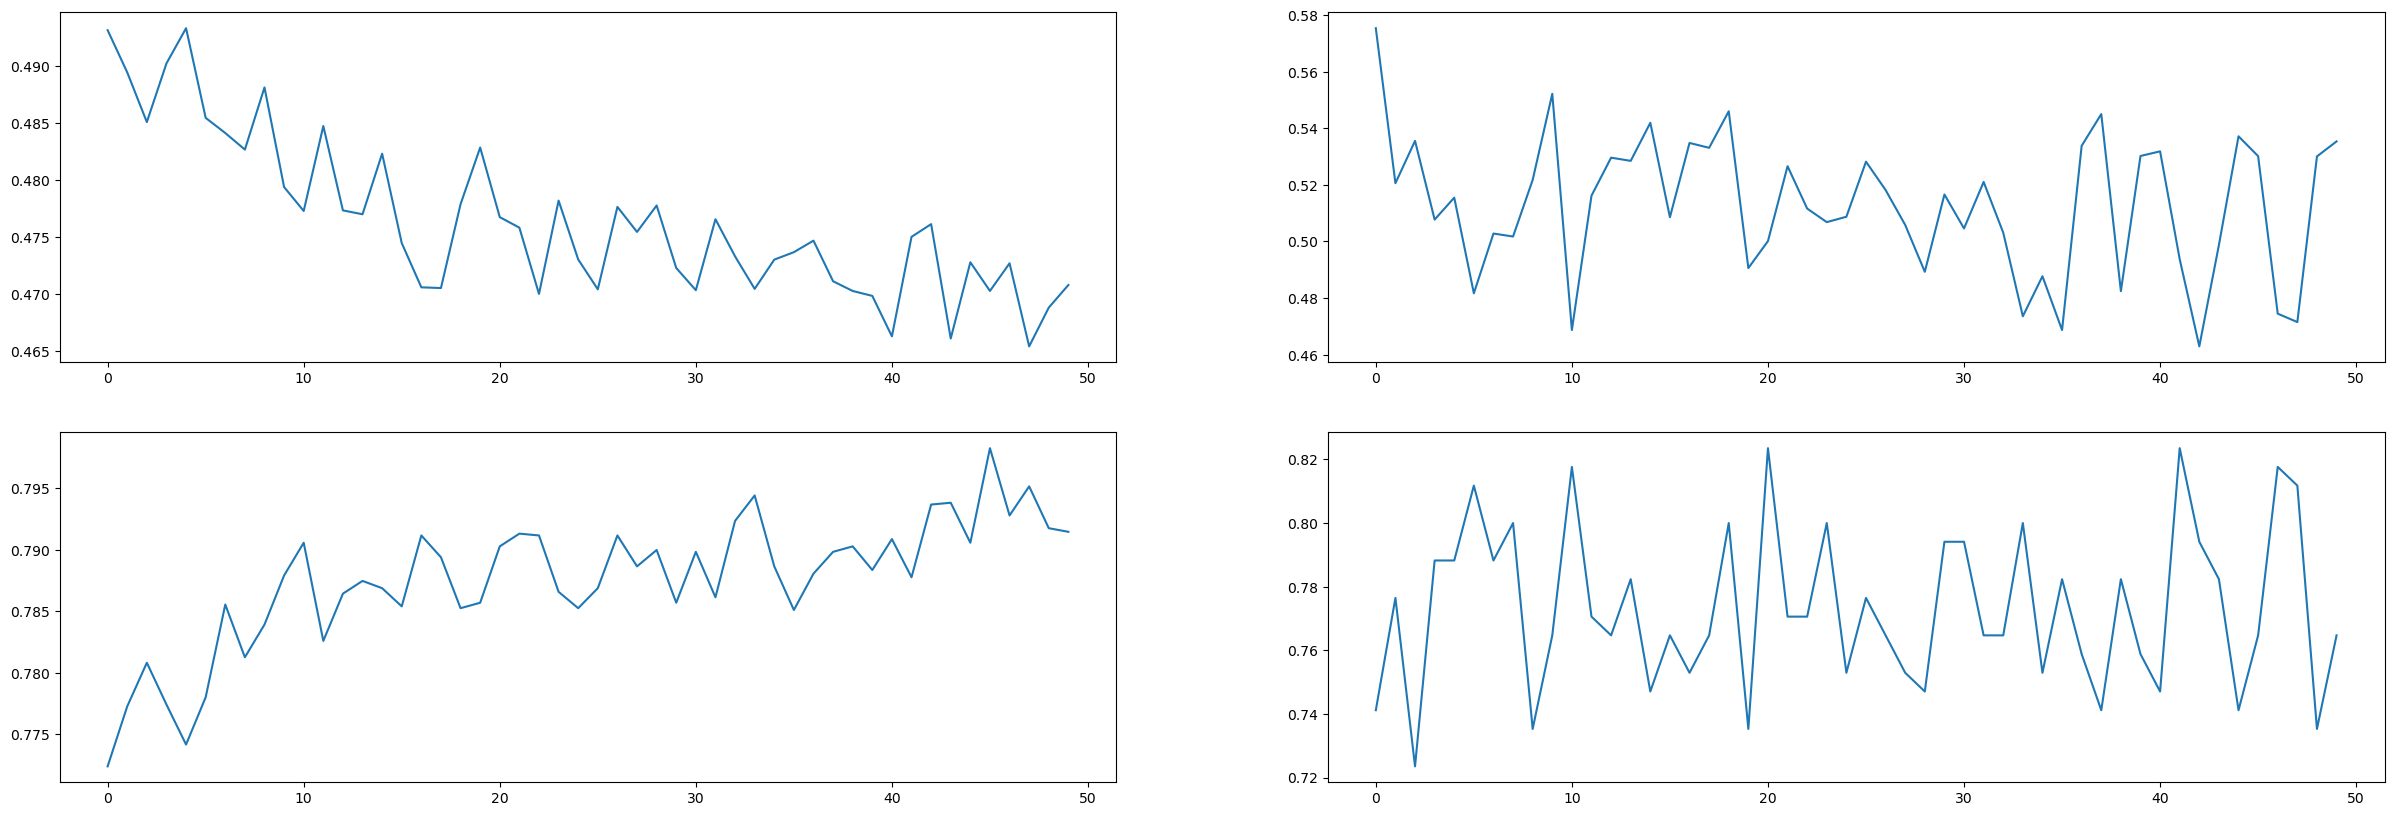

In [5]:
tf.keras.backend.clear_session()
model, convnext_fine_tune_history = Model_Training.main(    
    'convnext',
    train,
    val,
    epochs=50,
    patience=False,
    Earlystop=False,
    augmentation = True,
    trainable_layers = 25,
    flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=1e-4),
    train_log= train_log+'Fine_Tune.csv',
    load_weights = weights+'Dense/best_model',
    save_weights = weights+'Fine_Tune/best_model',
    learning_rate=1e-4,
    init_lr=1e-6,
    warmup=5,
    cosine=30,
    optimiser=tf.keras.optimizers.legacy.SGD(),
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

## Test

In [6]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('convnext',augmentation=False,Flatten='global_average_pooling',load_weights=weights+'Fine_Tune/best_model',metrics=metric,img_width=img_width,img_height=img_height)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 convnext_base (Functional)  (None, 9, 9, 1024)        87566464  
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                             

### Misclassified


In [7]:
store_misclassified = misclassified_store+'WITHOUTGCN_aug/'
model.evaluate(test)
misclassified_inceptionv3_test = Model_Training.store_misclassified(model,test,store_misclassified+'test/')
misclassified_inceptionv3_train = Model_Training.store_misclassified(model,train_test,store_misclassified+'train/')
misclassified_inceptionv3_val = Model_Training.store_misclassified(model,val_test,store_misclassified+'val/')

22/22 [==============================] - 4s 177ms/step


In [8]:
model.evaluate(test)

39/39 [==============================] - 6s 136ms/step - loss: 0.6552 - categorical_accuracy: 0.7267 - precision: 0.6791 - recall: 0.6842 - auc: 0.7784


[0.6552048325538635,
 0.7266880869865417,
 0.6791045069694519,
 0.6842105388641357,
 0.7783780097961426]

39/39 [==============================] - 5s 133ms/step


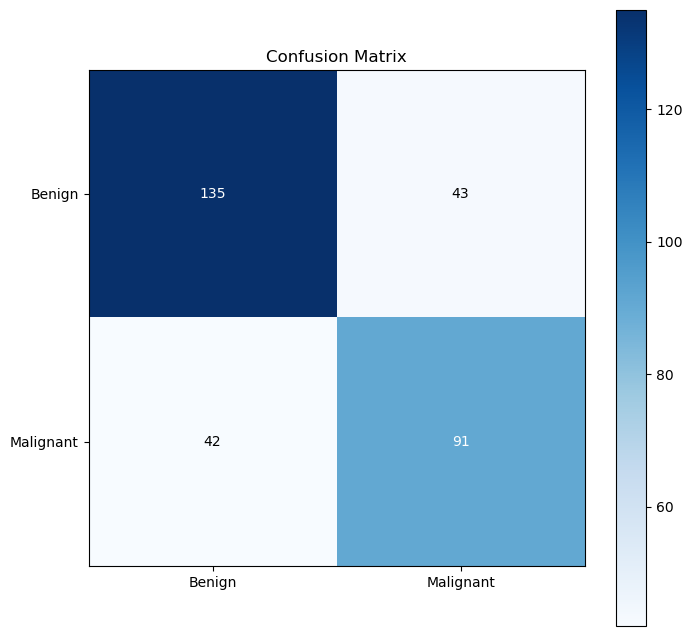

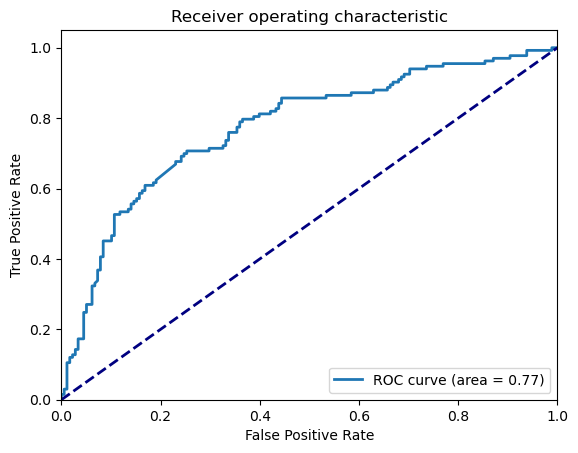

In [ ]:
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)

# Convnext data 2

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
roi_img_path = '/mnt/d/CBIS-DDSM/new_ROI/train_set_6/'
train_ds = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'train/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'val/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=batch_size)
train = train_ds.prefetch(AUTOTUNE)
val = val_ds.prefetch(AUTOTUNE)
test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'test/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=batch_size)
train_test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'train/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=batch_size)
val_test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'val/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=batch_size)

In [ ]:
weights = '/home/jj/FYP/Checkpoint/withGCN/'
train_log = '/home/jj/FYP/log/withGCN/'

## Init

In [ ]:
model, convnext_dense_history = Model_Training.main(    
    'convnext',
    train,
    val,
    epochs=50,
    patience=False,
    Earlystop=False,
    augmentation = True,
    trainable_layers = False,
    flatten='global_average_pooling',
    # regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'dense.csv',
    load_weights = False,
    save_weights = weights+'Dense/best_model',
    learning_rate=1e-3,
    init_lr=1e-6,
    optimiser=tf.keras.optimizers.Adam(),
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

## FT

In [ ]:
tf.keras.backend.clear_session()
model, convnext_fine_tune_history = Model_Training.main(    
    'convnext',
    train,
    val,
    epochs=100,
    patience=False,
    Earlystop=False,
    augmentation = True,
    trainable_layers = 25,
    flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'Fine_Tune.csv',
    load_weights = weights+'Dense/best_model',
    save_weights = weights+'Fine_Tune/best_model',
    learning_rate=1e-4,
    init_lr=1e-6,
    optimiser=tf.keras.optimizers.legacy.SGD(),
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

## Test

In [ ]:
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('convnext',augmentation=False,Flatten='global_average_pooling',load_weights=weights+'Fine_Tune/best_model',metrics=metric,img_height=img_height,img_width=img_width)

In [ ]:
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)

### Mis

In [ ]:
store_misclassified = misclassified_store+'withGCN/'
model.evaluate(test)
misclassified_inceptionv3_test = Model_Training.store_misclassified(model,test,store_misclassified+'test/')
misclassified_inceptionv3_train = Model_Training.store_misclassified(model,train_test,store_misclassified+'train/')
misclassified_inceptionv3_val = Model_Training.store_misclassified(model,val_test,store_misclassified+'val/')

# Convnext data 3

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
roi_img_path = '/mnt/d/CBIS-DDSM/new_ROI/resize_with_padding_2/'
train_ds = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'train/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'val/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=batch_size)
train = train_ds.prefetch(AUTOTUNE)
val = val_ds.prefetch(AUTOTUNE)
test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'test/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=batch_size)
train_test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'train/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=batch_size)
val_test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'val/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=batch_size)

In [ ]:
weights = '/home/jj/FYP/Checkpoint/inceptionv3_CBIS_DDSM_3/'
train_log = '/home/jj/FYP/log/inceptionv3_CBIS_DDSM_3/'

## Init

In [ ]:
model, convnext_dense_history = Model_Training.main(    
    'inceptionv3',
    train,
    val,
    epochs=20,
    patience=2,
    Earlystop=5,
    augmentation = True,
    trainable_layers = False,
    flatten='global_average_pooling',
    # regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'dense.csv',
    load_weights = False,
    save_weights = weights+'Dense/best_model',
    learning_rate=1e-4,
    init_lr=1e-6,
    optimiser=tf.keras.optimizers.Adam(),
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=0),tf.keras.metrics.Precision(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

## FT

In [ ]:
model, convnext_fine_tune_history = Model_Training.main(    
    'inceptionv3',
    train,
    val,
    epochs=300,
    patience=5,
    Earlystop=10,
    augmentation = True,
    # Top 25 layers are the stage 3 blocks
    trainable_layers = -1,
    flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(1e-4),
    train_log= train_log+'Fine_Tune.csv',
    load_weights = weights+'Dense/best_model',
    save_weights = weights+'Fine_Tune/best_model',
    learning_rate=1e-5,
    init_lr=1e-7,
    optimiser=tf.keras.optimizers.legacy.SGD(),
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

## Test

In [ ]:
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('inceptionv3',augmentation=False,Flatten='global_average_pooling',load_weights=weights+'Fine_Tune/best_model',metrics=metric,img_height=img_height,img_width=img_width)

### Mis

In [ ]:
store_misclassified = misclassified_store+'inceptionv3/'
model.evaluate(test)
misclassified_inceptionv3_test = Model_Training.store_misclassified(model,test,store_misclassified+'test/')
misclassified_inceptionv3_train = Model_Training.store_misclassified(model,train_test,store_misclassified+'train/')
misclassified_inceptionv3_val = Model_Training.store_misclassified(model,val_test,store_misclassified+'val/')

# Convnext data 4

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
roi_img_path = '/mnt/d/CBIS-DDSM/new_ROI/resize_with_padding_3/'
train_ds = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'train/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'val/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=batch_size)
train = train_ds.prefetch(AUTOTUNE)
val = val_ds.prefetch(AUTOTUNE)
test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'test/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=batch_size)
train_test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'train/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=batch_size)
val_test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'val/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=batch_size)

In [ ]:
weights = '/home/jj/FYP/Checkpoint/inceptionv3_CBIS_DDSM_4/'
train_log = '/home/jj/FYP/log/inceptionv3_CBIS_DDSM_4/'

## Init

In [ ]:
model, convnext_dense_history = Model_Training.main(    
    'inceptionv3',
    train,
    val,
    epochs=20,
    patience=2,
    Earlystop=5,
    augmentation = True,
    trainable_layers = False,
    flatten='global_average_pooling',
    # regulariser=tf.keras.regularizers.l2(l2=0.1),
    train_log= train_log+'dense.csv',
    load_weights = False,
    save_weights = weights+'Dense/best_model',
    learning_rate=1e-4,
    init_lr=1e-6,
    optimiser=tf.keras.optimizers.Adam(),
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=0),tf.keras.metrics.Precision(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

## FT

In [ ]:
model, convnext_fine_tune_history = Model_Training.main(    
    'inceptionv3',
    train,
    val,
    epochs=300,
    patience=5,
    Earlystop=10,
    augmentation = True,
    # Top 25 layers are the stage 3 blocks
    trainable_layers = -1,
    flatten='global_average_pooling',
    regulariser=tf.keras.regularizers.l2(1e-4),
    train_log= train_log+'Fine_Tune.csv',
    load_weights = weights+'Dense/best_model',
    save_weights = weights+'Fine_Tune/best_model',
    learning_rate=1e-5,
    init_lr=1e-7,
    optimiser=tf.keras.optimizers.legacy.SGD(),
    losses = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(class_id=0),tf.keras.metrics.Recall(class_id=1)],
    callbacks = [PrintLR()],
    img_height=img_height,img_width=img_width)

## Test

In [ ]:
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('inceptionv3',augmentation=False,Flatten='global_average_pooling',load_weights=weights+'Fine_Tune/best_model',metrics=metric,img_height=img_height,img_width=img_width)

### Mis

In [ ]:
store_misclassified = misclassified_store+'inceptionv3/'
model.evaluate(test)
misclassified_inceptionv3_test = Model_Training.store_misclassified(model,test,store_misclassified+'test/')
misclassified_inceptionv3_train = Model_Training.store_misclassified(model,train_test,store_misclassified+'train/')
misclassified_inceptionv3_val = Model_Training.store_misclassified(model,val_test,store_misclassified+'val/')